# Описание проекта

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.


**Описание данных**

    - airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
    - balcony — число балконов
    - ceiling_height — высота потолков (м)
    - cityCenters_nearest — расстояние до центра города (м)
    - days_exposition — сколько дней было размещено объявление (от публикации до снятия)
    - first_day_exposition — дата публикации
    - floor — этаж
    - floors_total — всего этажей в доме
    - is_apartment — апартаменты (булев тип)
    - kitchen_area — площадь кухни в квадратных метрах (м²)
    - last_price — цена на момент снятия с публикации
    - living_area — жилая площадь в квадратных метрах(м²)
    - locality_name — название населённого пункта
    - open_plan — свободная планировка (булев тип)
    - parks_around3000 — число парков в радиусе 3 км
    - parks_nearest — расстояние до ближайшего парка (м)
    - ponds_around3000 — число водоёмов в радиусе 3 км
    - ponds_nearest — расстояние до ближайшего водоёма (м)
    - rooms — число комнат
    - studio — квартира-студия (булев тип)
    - total_area — площадь квартиры в квадратных метрах (м²)
    - total_images — число фотографий квартиры в объявлении

Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Откройте файл с данными и изучите общую информацию

In [3]:
data = pd.read_csv('d:\\yandexDataScience\\Исследовательский анализ данных\\Проект\\real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.info()

# Большинство колонок имеют тип данных float.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [6]:
data.sample()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
13751,20,3750000.0,53.9,2017-05-15T00:00:00,2,2.55,5.0,28.8,1,NaN,...,7.5,NaN,Ломоносов,49475.0,52900.0,0.0,NaN,3.0,669.0,371.0


In [7]:
# Посмотрим пропуски в процентах по каждому столбцу/
data.isnull().sum().sort_values(ascending=False) / data.shape[0] * 100

is_apartment            88.290645
parks_nearest           65.909954
ponds_nearest           61.559559
balcony                 48.605426
ceiling_height          38.799105
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
ponds_around3000        23.283683
days_exposition         13.422507
kitchen_area             9.612220
living_area              8.029875
floors_total             0.362885
locality_name            0.206760
first_day_exposition     0.000000
last_price               0.000000
total_area               0.000000
studio                   0.000000
rooms                    0.000000
floor                    0.000000
open_plan                0.000000
total_images             0.000000
dtype: float64

In [8]:
 data.shape[0]

23699

## Предобработка данных

 - определите и изучите пропущенные значения:
        - для некоторых пропущенных значений можно предположить логичную замену. Например, если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0. Для других типов данных нет подходящего значения на замену. В этом случае правильно оставить эти значения пустыми. Отсутствие значения — тоже важный сигнал, который не нужно прятать;

In [9]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**заполните пропуски, где это уместно. Опишите, почему вы решили заполнить пропуски именно в этих столбцах и как выбрали значения;**

In [10]:
# Заменим букву ё на е в названиях населенных пунктах, чтобы уменьгить количество одникавоых наименований
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [11]:
data['locality_name'].nunique()

364

In [12]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True)

In [13]:
data['locality_name'].nunique()
# Уменьшили количество уникальных наименований

330

**1. balcony**

In [14]:
# Заменим пустые значения balcony на 0, т.к вероятно что пустые значения означают, что балкона в квартире нет.
data['balcony'].fillna('0', inplace=True)

In [15]:
data.isna().sum()
# Проверяем пустые значения после замены на 0

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**2. locality_name**

In [16]:
# Попытаемся определить в каких еще колонках можно заменить пустые значения
# Заменить название района, высоту потолка, жилую площадь, площадь кухни  не получиться, 
# т.к достоверно их определить не получится, а их замена на нулевое или среднее может исказить данные
data['locality_name'].value_counts(dropna=False)

Санкт-Петербург         15721
поселок Мурино            556
поселок Шушары            440
Всеволожск                398
Пушкин                    369
                        ...  
деревня Снегиревка          1
деревня Вахнова Кара        1
деревня Кисельня            1
село Никольское             1
деревня Пикколово           1
Name: locality_name, Length: 331, dtype: int64

**3. ceiling_height**

In [17]:
data['ceiling_height'].value_counts() 


2.50      3515
2.60      1646
2.70      1574
3.00      1112
2.80       993
          ... 
27.50        1
5.00         1
3.59         1
4.80         1
100.00       1
Name: ceiling_height, Length: 183, dtype: int64

In [18]:
data['ceiling_height'].isna().sum() / len(data['ceiling_height'])
# Приктически 40 % всех знчачений являются пустыми. Это достаточно большое количество. Вероятно многие пользователи просто не указывают это значенеи.

0.38799105447487237

In [19]:
# Найдем медианное значение
median_ceiling_height = data['ceiling_height'].median()
median_ceiling_height

2.65

In [20]:
# Обнаружилось одно значение потолка = 100м. Такого не может быть, вероятно это ошибка. 
data.query('ceiling_height == 100')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,...,11.0,5,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


In [21]:
# Заменим значение на 0
data.loc[data['ceiling_height'] == 100, 'ceiling_height'] = 0

**4. floors_total**

In [22]:
data['floors_total'].value_counts()

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
29.0       1
60.0       1
33.0       1
52.0       1
37.0       1
34.0       1
Name: floors_total, dtype: int64

<AxesSubplot:>

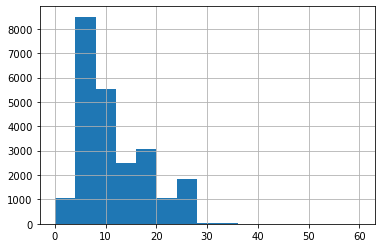

In [23]:
data['floors_total'].hist(bins=15, range=(0, 60))
# Основную долю составляют дома с этажностью до 10 этажей. Есть единичные знчанеи от 40 и выше этажей.

In [24]:
data['floors_total'].isna().sum()
# Количество пропусков

86

In [25]:
data['floors_total'].isna().sum() / data['floors_total'].count()
# Доля пропусков не значительна, поэтому сможем их удалить.

0.0036420615762503706

**5. living_area**

In [26]:
data['living_area'].value_counts()

18.00    882
17.00    675
30.00    598
16.00    486
20.00    481
        ... 
20.03      1
10.55      1
24.83      1
20.97      1
15.55      1
Name: living_area, Length: 1782, dtype: int64

<AxesSubplot:>

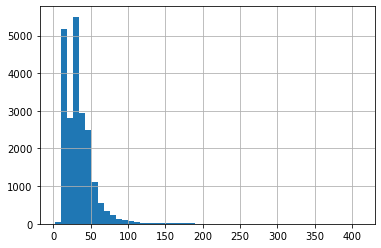

In [27]:
data['living_area'].hist(bins=50)
# Основная доля жилья имеет площадь до 50м 

In [28]:
# Есть Выбросы как по максимальному так и по минимальному значению
# Для заполнения пустых знчание будем брать медианное значение предварительно сгруппировав по комнатам rooms
data['living_area'].max()

409.7

In [29]:
data['living_area'].min()

2.0

**6. is_apartment**

In [30]:
data['is_apartment'].isna().sum()

20924

In [31]:
len(data['is_apartment'])
# Большая часть значения является пустыми. Возможно что пользователя просто пропускают это знчаение, если у них не аппартаменты
# Заменим пустые на False

23699

In [32]:
data['is_apartment'].isna().sum() / len(data['is_apartment'])

0.8829064517490189

**6. kitchen_area**

In [33]:
data['kitchen_area'].isna().sum()

2278

In [34]:
len(data['kitchen_area'])
# Около 10% имеют пустые значения

23699

<AxesSubplot:>

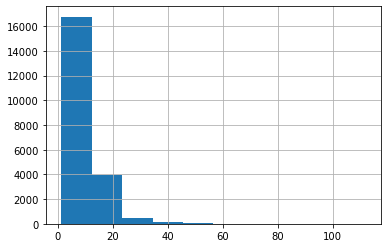

In [35]:
data['kitchen_area'].hist(bins=10)
# бльшинство сдаваемых квартир имеет площадь кухник до 15 м

In [36]:
data['kitchen_area'].describe()
# 75% квартир имеет площадь 12 и менее м2
# Максимальная площадь 112 м2

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

**7. airports_nearest.**

In [37]:
data['airports_nearest'].value_counts()

37434.0    61
21928.0    32
39946.0    30
44870.0    30
37407.0    27
           ..
25122.0     1
26768.0     1
22248.0     1
20475.0     1
14579.0     1
Name: airports_nearest, Length: 8275, dtype: int64

In [38]:
data.query('airports_nearest == 37434.0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
177,3,21042018.0,154.90,2017-09-10T00:00:00,4,3.3,16.0,89.11,3,NaN,...,21.30,0,Санкт-Петербург,37434.0,8460.0,1.0,441.0,2.0,427.0,563.0
565,3,8945261.0,67.70,2018-07-04T00:00:00,2,3.3,16.0,38.95,9,NaN,...,9.90,0,Санкт-Петербург,37434.0,8460.0,1.0,441.0,2.0,427.0,205.0
1633,3,20445000.0,141.00,2018-07-04T00:00:00,3,3.3,16.0,65.72,11,NaN,...,35.35,0,Санкт-Петербург,37434.0,8460.0,1.0,441.0,2.0,427.0,266.0
2330,1,29216000.0,176.00,2016-10-17T00:00:00,5,3.1,16.0,100.10,16,NaN,...,19.00,0,Санкт-Петербург,37434.0,8460.0,1.0,441.0,2.0,427.0,900.0
3247,3,10366538.0,83.70,2018-07-04T00:00:00,3,3.3,16.0,52.21,3,NaN,...,11.78,0,Санкт-Петербург,37434.0,8460.0,1.0,441.0,2.0,427.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22013,1,13479200.0,81.20,2017-01-11T00:00:00,3,3.1,16.0,43.83,11,NaN,...,14.00,0,Санкт-Петербург,37434.0,8460.0,1.0,441.0,2.0,427.0,814.0
22455,1,11615600.0,81.80,2015-08-10T00:00:00,3,3.1,16.0,43.83,3,NaN,...,14.58,0,Санкт-Петербург,37434.0,8460.0,1.0,441.0,2.0,427.0,1334.0
22665,2,23300000.0,172.00,2016-11-10T00:00:00,4,NaN,16.0,95.60,10,NaN,...,19.60,0,Санкт-Петербург,37434.0,8460.0,1.0,441.0,2.0,427.0,NaN
23018,6,8555000.0,64.85,2019-04-24T00:00:00,2,3.1,14.0,NaN,13,NaN,...,11.70,2,Санкт-Петербург,37434.0,8460.0,1.0,441.0,2.0,427.0,NaN


<AxesSubplot:>

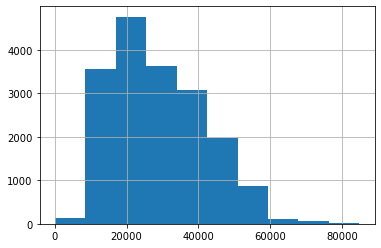

In [39]:
data['airports_nearest'].hist(bins=10)
# Основные значения находятся в диапазоне 10-40 км.

In [40]:
# Посчитаем процент пустых значений
ratio_airports_nearest = data['airports_nearest'].isna().sum() / len(data['airports_nearest'])
print('Процент {} пустых значений = {:.2f}'.format('airports_nearest', ratio_airports_nearest * 100))
# Вероятно придется заменять значения на медианные

Процент airports_nearest пустых значений = 23.38


**8. cityCenters_nearest**

In [41]:
data['cityCenters_nearest'].value_counts()


8460.0     61
20802.0    32
10720.0    30
8434.0     27
20444.0    27
           ..
13104.0     1
11280.0     1
27218.0     1
10501.0     1
208.0       1
Name: cityCenters_nearest, Length: 7642, dtype: int64

<AxesSubplot:>

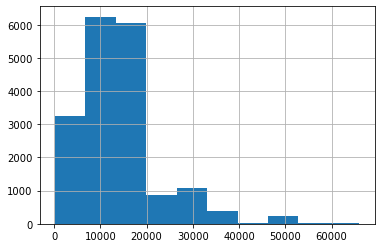

In [42]:
data['cityCenters_nearest'].hist(bins=10)
# Основные значения находятся в диапазоне до 20 км.

In [43]:
# Посчитаем процент пустых значений
ratio_cityCenters_nearest = data['cityCenters_nearest'].isna().sum() / len(data['cityCenters_nearest'])
print('Процент {} пустых значений = {:.2f}'.format('cityCenters_nearest', ratio_cityCenters_nearest * 100))
# Вероятно придется заменять значения на медианные
# Возможно, что те чь имщество находится на значительном удалении от центра пожелали не указывать ьэтоот факт

Процент cityCenters_nearest пустых значений = 23.29


**9. parks_around3000**

In [44]:
ratio_parks_around3000 = data['parks_around3000'].isna().sum() / len(data['parks_around3000'])
print('Процент {} пустых значений = {:.2f}'.format('parks_around3000', ratio_parks_around3000 * 100))
# Видно закономерность между пустыми значениями cityCenters_nearest, parks_around3000, 

Процент parks_around3000 пустых значений = 23.28


<AxesSubplot:>

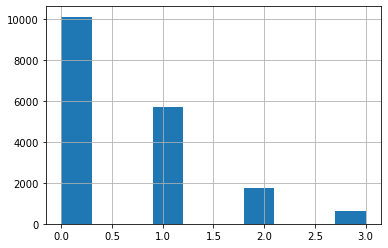

In [45]:
data['parks_around3000'].hist()
# Диапазон от 0 до 3. При этом преобладают 0 значения.

**10. parks_nearest**

<AxesSubplot:>

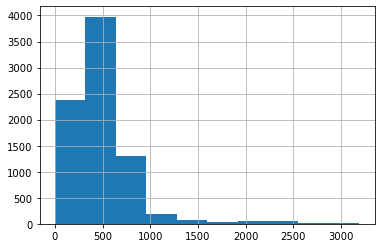

In [46]:
data['parks_nearest'].hist()
#  Большая часть квартир имеет парк в радиусе 1км.

In [47]:
parks_nearest_na = data['parks_nearest'].isna().sum() / len(data['parks_nearest'])
print('Процент {} пустых значений = {:.2f}'.format('parks_nearest_na', parks_nearest_na * 100))
# Большое количество пропусков
# Возможно придется заменять медианной

Процент parks_nearest_na пустых значений = 65.91


**11. ponds_around3000**

<AxesSubplot:>

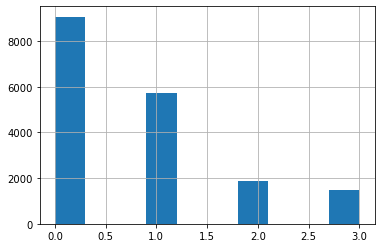

In [48]:
data['ponds_around3000'].hist()
# Значения очень схожи с параметром parks_around3000. Вероятно предполагалось, что в парке имеются небольшие водоемы
# Диапазон от 0 до 3. При этом преобладают 0 значения.

In [49]:
data['ponds_around3000'].value_counts(dropna=False)

0.0    9071
1.0    5717
NaN    5518
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64

In [50]:
data.query('ponds_around3000 == "NaN"')
# В основном пустые значения в поселках или новых застраиваемых райнонах

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,0,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.00,5,NaN,...,9.00,0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,NaN,...,11.00,2,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,...,NaN,0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,NaN,...,5.50,0,поселок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.50,4,NaN,...,6.00,0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.00,4,NaN,...,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.70,1,NaN,...,NaN,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
ponds_around3000_na = data['ponds_around3000'].isna().sum() / len(data['ponds_around3000'])
print('Процент {} пустых значений = {:.2f}'.format('ponds_around3000_na', ponds_around3000_na * 100))

Процент ponds_around3000_na пустых значений = 23.28


In [52]:
data['ponds_around3000'].describe()

count    18181.000000
mean         0.770255
std          0.938346
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

In [53]:
# Возможно, пропуски означают, что парков в ближаших 3000 м нет. Заменим на 0

**12. ponds_nearest**

In [54]:
data['ponds_nearest'].value_counts(dropna=False) / len(data['ponds_nearest'])
# 60 процентов пропусков

NaN       0.615596
427.0     0.002954
454.0     0.001730
153.0     0.001688
433.0     0.001646
            ...   
600.0     0.000042
258.0     0.000042
37.0      0.000042
1041.0    0.000042
867.0     0.000042
Name: ponds_nearest, Length: 1097, dtype: float64

<AxesSubplot:>

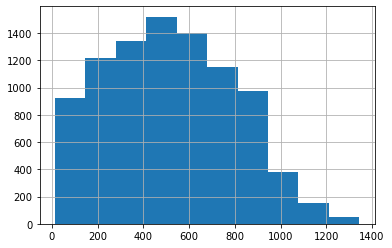

In [55]:
data['ponds_nearest'].hist()
# Большинство квартир имеет в радиусе 1000 м водоем

In [56]:
data['ponds_nearest'].describe()

count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

**13. days_exposition**

In [57]:
data['days_exposition'].value_counts(dropna=False) / len(data['days_exposition'])
# Пропусков около 13%

NaN       0.134225
45.0      0.037132
60.0      0.022701
7.0       0.009874
30.0      0.008777
            ...   
1355.0    0.000042
873.0     0.000042
730.0     0.000042
976.0     0.000042
773.0     0.000042
Name: days_exposition, Length: 1142, dtype: float64

<AxesSubplot:>

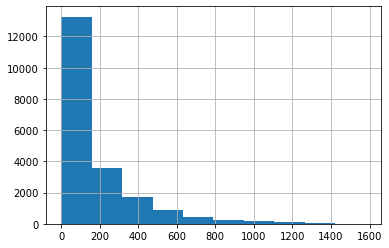

In [58]:
data['days_exposition'].hist()
# Большинство значений имеет срок публикации 250 дн

In [59]:
data['days_exposition'].describe()
# Здесь заменять не будем, возможно объявления еще актуально.
# Возможно стоит убрать выбросы

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

## Предобработка данных

In [60]:
# Удалим все строки, где жилая площадь меньше 15м2
data.query('living_area > 15', inplace=True)

In [61]:
# Проверим наличие дубликатов и при необходимости удалим их
data.duplicated().sum()
# Дубликатов нет

0

In [62]:
# data.query('rooms == 0')
# Квартиры с нулевым количетвом комнат веротней всего студии, поэтому удалять или изменять нулевые значения не будем

In [63]:
# В переменную помещаем колонки, пустые значения которых будут замененны на медиану
columns_with_median = ['cityCenters_nearest', 'airports_nearest', 'parks_nearest', 'ponds_nearest']

In [64]:
for column in data[columns_with_median]:
    data[column] = data[column].fillna(data[column].median())

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20778 entries, 0 to 23696
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          20778 non-null  int64  
 1   last_price            20778 non-null  float64
 2   total_area            20778 non-null  float64
 3   first_day_exposition  20778 non-null  object 
 4   rooms                 20778 non-null  int64  
 5   ceiling_height        13195 non-null  float64
 6   floors_total          20734 non-null  float64
 7   living_area           20778 non-null  float64
 8   floor                 20778 non-null  int64  
 9   is_apartment          2551 non-null   object 
 10  studio                20778 non-null  bool   
 11  open_plan             20778 non-null  bool   
 12  kitchen_area          20051 non-null  float64
 13  balcony               20778 non-null  object 
 14  locality_name         20735 non-null  object 
 15  airports_nearest   

In [66]:
# В переменную помещаем колонки, пустые значения которых будут замененны на 0
columns_with_null = ['parks_around3000', 'ponds_around3000']

In [67]:
# Заполняем значения
for column in data[columns_with_null]:
    data[column] = data[column].fillna(0)

In [68]:
# Надем медианное значение высоты потолков по населенным пунктам и этажности. По сводной таблице видно, что
# data.pivot_table(index=['locality_name', 'floors_total'], values='ceiling_height', aggfunc=['median', 'count'])

In [69]:
data.pivot_table(index='floors_total', values='ceiling_height', aggfunc=['median', 'count'])

,median,count
,ceiling_height,ceiling_height
floors_total,,
1.0,2.90,9
2.0,2.70,201
3.0,2.80,361
4.0,3.00,715
5.0,2.55,3372
6.0,3.05,573
7.0,3.00,365
8.0,2.80,196


In [70]:
# Заменим все пустые значения на средние в группировке по этажности и населенному пункту. Там где среднего нет по группировке заполнил медианным по столбцу ceiling_height
# data['ceiling_height_temp'] = data.groupby(['floors_total', 'locality_name'])['ceiling_height'].apply(lambda x: x.fillna(x.median())).fillna(data['ceiling_height'].median())

In [71]:
# Заменим все пустые значения на медианные в группировке по этажности. Там где среднего нет по группировке заполнил медианным по столбцу ceiling_height
data['ceiling_height_temp'] = data.groupby('floors_total')['ceiling_height'].apply(lambda x: x.fillna(x.median())).fillna(data['ceiling_height'].median())

In [72]:
# Проверка полученных результатов
data[['ceiling_height', 'floors_total', 'ceiling_height_temp']]

,ceiling_height,floors_total,ceiling_height_temp
0,2.70,16.0,2.70
1,NaN,11.0,2.73
2,NaN,5.0,2.55
4,3.03,14.0,3.03
8,NaN,27.0,2.70
...,...,...,...
23692,NaN,5.0,2.55
23693,2.60,9.0,2.60
23694,3.70,5.0,3.70
23695,NaN,5.0,2.55


In [73]:
# Применим полученные значения к колонке ceiling_height
data['ceiling_height'] = data \
    .groupby('floors_total')['ceiling_height'] \
    .apply(lambda x: x.fillna(x.median())) \
    .fillna(data['ceiling_height'].median()) 

In [74]:
# Удалим временную колонку ceiling_height_temp
del data['ceiling_height_temp']

In [75]:
# floors_total. Разделим на дома на группы по этажности, чтобы затем задать медианное значение
def grouped_by_floor(row):
    floor = row['floor']
    if floor <= 9:
        return 'до 9 этажей'
    elif floor > 9 and floor <= 17:
        return '9-17 этажей'
    else:
        return 'больше 17 этажей'

In [76]:
data['grouped_by_floor'] = data.apply(grouped_by_floor, axis=1)

In [77]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,grouped_by_floor
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,до 9 этажей
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.73,11.0,18.60,1,NaN,...,2,поселок Шушары,12817.0,18603.0,0.0,454.0,0.0,503.0,81.0,до 9 этажей
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.55,5.0,34.30,4,NaN,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,до 9 этажей
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,9-17 этажей
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.43,26,NaN,...,0,поселок Мурино,26582.0,13056.0,0.0,454.0,0.0,503.0,189.0,больше 17 этажей


In [78]:
# Теперь применим лямбда функцию к столбцу grouped_by_floor для заполнения медианы к пропускам
data['floors_total'] = data \
    .groupby('grouped_by_floor')['floors_total'] \
    .apply(lambda x: x.fillna(x.median()))

In [79]:
data.floors_total.isna().sum() 
# Пустых значений не осталось

0

In [80]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            18227
studio                      0
open_plan                   0
kitchen_area              727
balcony                     0
locality_name              43
airports_nearest            0
cityCenters_nearest         0
parks_around3000            0
parks_nearest               0
ponds_around3000            0
ponds_nearest               0
days_exposition          2890
grouped_by_floor            0
dtype: int64

### living_area

In [81]:
data.pivot_table(index=['locality_name', 'rooms'], values='living_area', aggfunc='median')

living_area
locality_name        rooms             
Бокситогорск         1            18.00
                     2            29.00
                     3            44.70
                     4            46.00
Волосово             1            17.10
...                                 ...
село Русско-Высоцкое 1            18.95
                     2            30.20
                     3            37.90
село Старая Ладога   1            15.80
село Шум             3            42.30

[743 rows x 1 columns]

In [82]:
# Расчитаем медианное значение для жилой площади в группировке по населенному пункту и количеству комнат
data['living_area'] = data.groupby(['locality_name', 'rooms'])['living_area'] \
    .apply(lambda x: x.fillna(x.median())) \
    .fillna(data['living_area'].median())

In [83]:
# Проверка на пустые значения
data['living_area'].isna().sum()

0

### kitchen_area

In [84]:
data.pivot_table(index='total_area', values='kitchen_area', aggfunc=['mean', 'count'])

,mean,count
,kitchen_area,kitchen_area
total_area,,
17.78,NaN,0
18.00,NaN,0
18.80,NaN,0
18.90,NaN,0
20.00,NaN,0
...,...,...
517.00,22.0,1
590.00,100.0,1


In [85]:
# Посчитаем отношение площади кухни к общей площади квартиры по медиане. Затем это значение умножим на общую площадь в пустых значениях колонки kitchen_area
median_kitchen_ratio = (data['kitchen_area'] / data['total_area']).median()

In [86]:
data['kitchen_ratio'] = data['kitchen_area'].fillna(data['total_area'] * median_kitchen_ratio) 

In [87]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * median_kitchen_ratio) 

In [88]:
# Заменим на среднее по общей и жилой площади в м2
# data['kitchen_ratio'] = data.groupby('total_area')['kitchen_area'] \
#                             .apply(lambda x: x.fillna(x.mean())) 
#                             .fillna(data['kitchen_area'].mean())

In [89]:
data[['living_area', 'total_area', 'locality_name', 'kitchen_ratio', 'kitchen_area', 'rooms']].loc[280:350]

,living_area,total_area,locality_name,kitchen_ratio,kitchen_area,rooms
280,34.4,63.0,Санкт-Петербург,10.540385,10.540385,2
281,18.0,45.2,поселок Мурино,14.200000,14.200000,1
282,65.0,115.0,Санкт-Петербург,14.000000,14.000000,2
283,36.7,62.4,Шлиссельбург,8.100000,8.100000,3
284,17.2,30.5,Павловск,5.000000,5.000000,1
...,...,...,...,...,...,...
346,33.6,48.2,деревня Оржицы,5.500000,5.500000,3
347,42.0,72.0,деревня Кальтино,12.000000,12.000000,2
348,18.6,34.4,Санкт-Петербург,7.100000,7.100000,1
349,17.0,25.0,деревня Кудрово,4.182692,4.182692,0


In [90]:
data['kitchen_area'].isna().sum()

0

In [91]:
# Удалим строки с пустыми именами
data.dropna(subset=['locality_name'], inplace = True)   

### is_apartment

In [92]:
# Заменим пустые згчения на False и сразу изменим тип данных
data['is_apartment'] = data['is_apartment'].fillna(False).astype('int')

### balcony

In [93]:

data['balcony'].astype('int')

0        0
1        2
2        0
4        0
8        0
        ..
23692    0
23693    0
23694    0
23695    0
23696    0
Name: balcony, Length: 20735, dtype: int32

In [94]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         2889
grouped_by_floor           0
kitchen_ratio              0
dtype: int64

In [95]:
del data['kitchen_ratio']

### Изменение типа данных

In [96]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [97]:
data['balcony'] = data['balcony'].astype('int')

In [98]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,grouped_by_floor
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,0,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,до 9 этажей
1,7,3350000.0,40.40,2018-12-04,1,2.73,11.0,18.60,1,0,...,2,поселок Шушары,12817.0,18603.0,0.0,454.0,0.0,503.0,81.0,до 9 этажей
2,10,5196000.0,56.00,2015-08-20,2,2.55,5.0,34.30,4,0,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,до 9 этажей
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,0,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,9-17 этажей
8,20,2900000.0,33.16,2018-05-23,1,2.70,27.0,15.43,26,0,...,0,поселок Мурино,26582.0,13056.0,0.0,454.0,0.0,503.0,189.0,больше 17 этажей


## Посчитайте и добавьте в таблицу

### Цена квадратного метра

In [99]:
data['price_per_square_metre'] = data['last_price'] / data['total_area']
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,grouped_by_floor,price_per_square_metre
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,0,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,до 9 этажей,120370.370370
1,7,3350000.0,40.40,2018-12-04,1,2.73,11.0,18.60,1,0,...,поселок Шушары,12817.0,18603.0,0.0,454.0,0.0,503.0,81.0,до 9 этажей,82920.792079
2,10,5196000.0,56.00,2015-08-20,2,2.55,5.0,34.30,4,0,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,до 9 этажей,92785.714286
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,0,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,9-17 этажей,100000.000000
8,20,2900000.0,33.16,2018-05-23,1,2.70,27.0,15.43,26,0,...,поселок Мурино,26582.0,13056.0,0.0,454.0,0.0,503.0,189.0,больше 17 этажей,87454.764777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000.0,30.00,2017-07-07,1,2.55,5.0,17.50,4,0,...,Тихвин,26582.0,13056.0,0.0,454.0,0.0,503.0,413.0,до 9 этажей,45000.000000
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9.0,40.00,8,0,...,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0,до 9 этажей,73717.948718
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.30,3,0,...,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,до 9 этажей,72490.845228
23695,14,3100000.0,59.00,2018-01-15,3,2.55,5.0,38.00,4,0,...,Тосно,26582.0,13056.0,0.0,454.0,0.0,503.0,45.0,до 9 этажей,52542.372881


### День недели, месяц и год публикации объявления

In [100]:
# Создаем новый столбец, в который записываем день публикации
data['day_of_month_pub'] = data['first_day_exposition'].dt.weekday
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,grouped_by_floor,price_per_square_metre,day_of_month_pub
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,0,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,до 9 этажей,120370.370370,3
1,7,3350000.0,40.40,2018-12-04,1,2.73,11.0,18.60,1,0,...,12817.0,18603.0,0.0,454.0,0.0,503.0,81.0,до 9 этажей,82920.792079,1
2,10,5196000.0,56.00,2015-08-20,2,2.55,5.0,34.30,4,0,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,до 9 этажей,92785.714286,3
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,0,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,9-17 этажей,100000.000000,1
8,20,2900000.0,33.16,2018-05-23,1,2.70,27.0,15.43,26,0,...,26582.0,13056.0,0.0,454.0,0.0,503.0,189.0,больше 17 этажей,87454.764777,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000.0,30.00,2017-07-07,1,2.55,5.0,17.50,4,0,...,26582.0,13056.0,0.0,454.0,0.0,503.0,413.0,до 9 этажей,45000.000000,4
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9.0,40.00,8,0,...,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0,до 9 этажей,73717.948718,4
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.30,3,0,...,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,до 9 этажей,72490.845228,1
23695,14,3100000.0,59.00,2018-01-15,3,2.55,5.0,38.00,4,0,...,26582.0,13056.0,0.0,454.0,0.0,503.0,45.0,до 9 этажей,52542.372881,0


In [101]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

### Добавляем этаж квартиры

**Категоризируем этажи floor при помощи функции**

In [102]:
def grouped_floor(row):
    floor = row['floor']
    floor_total = row['floors_total']
    if floor == 1:
        return 'Первый'
    elif floor == floor_total:
        return 'Последний'
    else:
        return 'Другое'

In [103]:
data['grouped_floor'] = data.apply(grouped_floor, axis=1)

### Добавляем соотношение жилой и общей площади, а также отношение площади кухни к общей

In [104]:
data['living_to_total_square'] = round(data['living_area'] / data['total_area'], 2)

In [105]:
data['kitchen_to_total_square'] = round(data['kitchen_area'] / data['total_area'], 2)

 **Вывод**

На этом этапе добавили несколько новых признаков, которые помогут в дальнейшем. Новые признаки позволять выполнять группировку по дню, месяцу и году публикации
Признаки оценивающие отношение жилой площади к общей и площадь кухни к общей помогут в дальнейшем более точно планировать цену

## Проведите исследовательский анализ данных и выполните инструкции:

### Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

Построим гистрограмму по площади

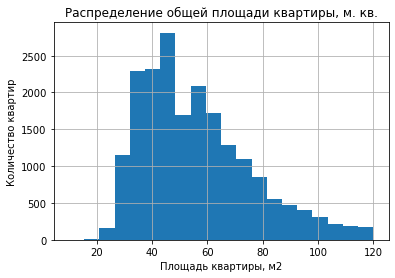

In [106]:
data.hist('total_area', bins=20, range=(10, 120))
plt.title('Распределение общей площади квартиры, м. кв.')
plt.xlabel('Площадь квартиры, м2')
plt.ylabel('Количество квартир');

По гистограмме видно, что большая часть сдаваемого жилья имеет площадь в диапазоне от  30 до 70 метров. Есть ли выбросы (300м2)

- Построим гистрограмму по цене

In [107]:
# добавим новый столбец  ценой в миллионах (для наглядности на графике)
data['last_price_million'] = data['last_price'] / 1000000

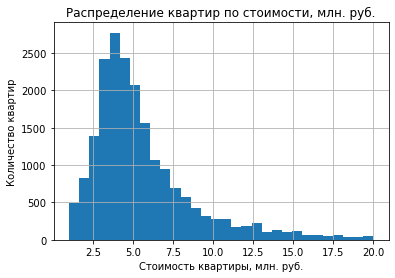

In [108]:
data.hist('last_price_million', bins=30, range=(1,20))
plt.title('Распределение квартир по стоимости, млн. руб.')
plt.xlabel('Стоимость квартиры, млн. руб.')
plt.ylabel('Количество квартир');

**Основной диапазон цен лежит в области от 2,5 до 7 млн.руб**

- Построим гистрограмму по числу комнат

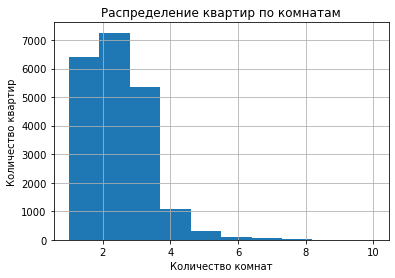

In [109]:
data.hist('rooms', bins=10, range=(1,10))
plt.title('Распределение квартир по комнатам')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир');

**В основном квартиры имеют от 1 до 3 комнат**

- Построим гистрограмму по высоте потолков

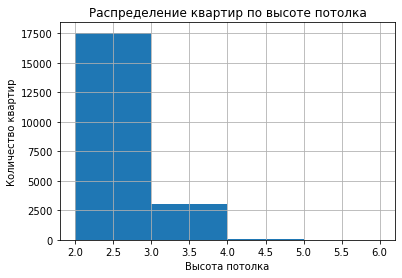

In [110]:
data.hist('ceiling_height', bins=4, range=(2, 6))
plt.title('Распределение квартир по высоте потолка')
plt.xlabel('Высота потолка')
plt.ylabel('Количество квартир');

**В основном квартиры имеют от высоту потолков от 2 до 3 метров**

### Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

In [111]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,grouped_by_floor,price_per_square_metre,day_of_month_pub,weekday,month,year,grouped_floor,living_to_total_square,kitchen_to_total_square,last_price_million
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,0,...,до 9 этажей,120370.370370,3,3,3,2019,Другое,0.47,0.23,13.000
1,7,3350000.0,40.40,2018-12-04,1,2.73,11.0,18.60,1,0,...,до 9 этажей,82920.792079,1,1,12,2018,Первый,0.46,0.27,3.350
2,10,5196000.0,56.00,2015-08-20,2,2.55,5.0,34.30,4,0,...,до 9 этажей,92785.714286,3,3,8,2015,Другое,0.61,0.15,5.196
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,0,...,9-17 этажей,100000.000000,1,1,6,2018,Другое,0.32,0.41,10.000
8,20,2900000.0,33.16,2018-05-23,1,2.70,27.0,15.43,26,0,...,больше 17 этажей,87454.764777,2,2,5,2018,Другое,0.47,0.27,2.900


In [112]:
del data['day_of_month_pub']

<AxesSubplot:>

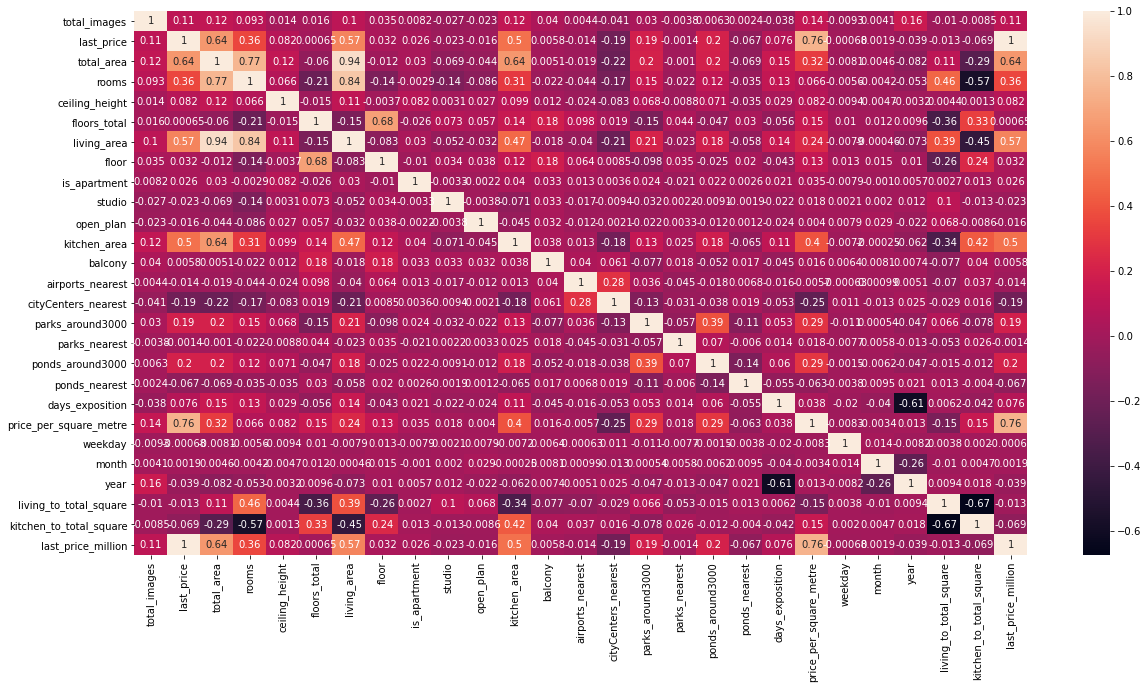

In [113]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(20,10))  
sns.heatmap(corr, annot=True, ax=ax)
# Из тепловой карты можно заметить корреляцию показателя days_exposition с годом

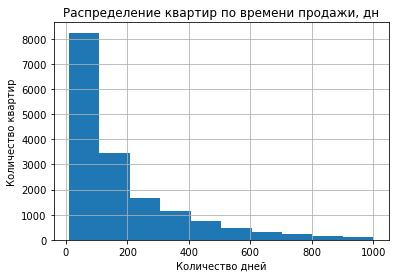

In [114]:
data.hist('days_exposition', bins=10, range=(10, 1000))
plt.title('Распределение квартир по времени продажи, дн')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир');

In [115]:
data['days_exposition'].describe()
# Среднее время продажи квартиры 200 дн.

count    17846.000000
mean       185.965202
std        222.034347
min          1.000000
25%         45.000000
50%        102.000000
75%        240.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [116]:
data['days_exposition'].mean()

185.9652022862266

In [117]:
data['days_exposition'].median()

102.0

- Среднее количество дней продажи существенно отличается отмедианного значения (почти в 2 раза). Это подтверждается гистограммой на которой видно, что большинстов квартир продается в первые 100 дн, после выставления объявления.

- **Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.**

In [118]:
# Квартиры менее 15 кв.м удалили в самом начале.
data.query('total_area < 15')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,grouped_by_floor,price_per_square_metre,weekday,month,year,grouped_floor,living_to_total_square,kitchen_to_total_square,last_price_million


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


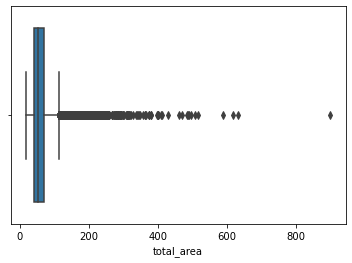

In [119]:
# Посмотрим на выбросы по общей площади

sns.boxplot(data['total_area'])
plt.show()
# Есть выбросы от 200 м до 800. Поробуем детальныей опсмотреть, что это за лоты.

In [120]:
data.query('total_area > 200')
# Из среза данных видно, что это премиальные квартиры с высокой стоимостью, поэтому удалять их не будем.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,grouped_by_floor,price_per_square_metre,weekday,month,year,grouped_floor,living_to_total_square,kitchen_to_total_square,last_price_million
155,8,96000000.0,317.0,2017-07-07,4,3.50,3.0,183.0,3,0,...,62.0,до 9 этажей,302839.116719,4,7,2017,Последний,0.58,0.17,96.0000
464,15,66571000.0,280.3,2015-06-11,6,5.20,8.0,159.5,7,0,...,578.0,до 9 этажей,237499.108098,3,6,2015,Другое,0.57,0.08,66.5710
492,18,95000000.0,216.0,2017-12-05,4,3.00,5.0,86.0,4,0,...,14.0,до 9 этажей,439814.814815,1,12,2017,Другое,0.40,0.36,95.0000
509,5,90000000.0,225.0,2016-06-26,6,3.00,4.0,134.0,2,0,...,416.0,до 9 этажей,400000.000000,6,6,2016,Другое,0.60,0.09,90.0000
521,20,25717300.0,230.1,2015-01-21,3,2.80,3.0,130.0,1,0,...,1441.0,до 9 этажей,111765.754020,2,1,2015,Первый,0.56,0.11,25.7173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23005,20,30750000.0,297.5,2018-09-09,6,3.14,4.0,181.8,2,0,...,42.0,до 9 этажей,103361.344538,6,9,2018,Другое,0.61,0.07,30.7500
23281,20,24800000.0,231.2,2015-01-21,6,3.10,5.0,99.8,4,0,...,NaN,до 9 этажей,107266.435986,2,1,2015,Другое,0.43,0.12,24.8000
23327,19,34400000.0,215.0,2019-03-15,5,2.75,4.0,82.4,4,0,...,NaN,до 9 этажей,160000.000000,4,3,2019,Последний,0.38,0.19,34.4000
23400,17,30000000.0,213.0,2017-09-28,7,3.40,5.0,151.4,5,0,...,299.0,до 9 этажей,140845.070423,3,9,2017,Последний,0.71,0.14,30.0000


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


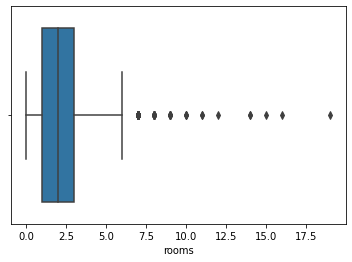

In [121]:
# Посмотрим на выбросы по общей количеству комнат

sns.boxplot(data['rooms'])
plt.show()

In [122]:
data.query('rooms > 10')
# В каких-то строках явно есть выбросы, например при жилой площади 138 м, количество комнать = 11, а где нет, потому что общая площадь 300-400м и количество комнат 10
# Уберем строки, где комнат меньше 1 и больше 8.


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,grouped_by_floor,price_per_square_metre,weekday,month,year,grouped_floor,living_to_total_square,kitchen_to_total_square,last_price_million
648,3,17500000.0,183.7,2018-07-01,11,3.40,7.0,138.8,7,0,...,NaN,до 9 этажей,95264.017420,6,7,2018,Последний,0.76,0.07,17.500
866,5,25000000.0,363.0,2017-12-23,14,3.16,5.0,222.0,4,0,...,418.0,до 9 этажей,68870.523416,5,12,2017,Другое,0.61,0.05,25.000
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6.0,409.0,3,0,...,14.0,до 9 этажей,110169.491525,3,2,2019,Другое,0.69,0.17,65.000
9688,8,33000000.0,194.1,2017-02-07,11,3.43,5.0,129.0,2,0,...,813.0,до 9 этажей,170015.455951,1,2,2017,Другое,0.66,0.06,33.000
14498,6,32250000.0,374.6,2018-06-09,19,2.55,5.0,264.5,2,0,...,114.0,до 9 этажей,86091.831287,5,6,2018,Другое,0.71,0.07,32.250
18848,6,28500000.0,270.0,2015-03-02,16,3.00,4.0,180.0,4,0,...,1365.0,до 9 этажей,105555.555556,0,3,2015,Последний,0.67,0.05,28.500
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.7,25,0,...,106.0,больше 17 этажей,466666.666667,2,12,2017,Последний,0.46,0.12,420.000
20829,6,28659000.0,245.4,2016-03-31,14,3.00,4.0,168.3,2,0,...,95.0,до 9 этажей,116784.841076,3,3,2016,Другое,0.69,0.11,28.659


In [123]:
# Уберем строки, где комнат меньше 1 и больше 8.
data = data.query('rooms >= 1 and rooms <=7')

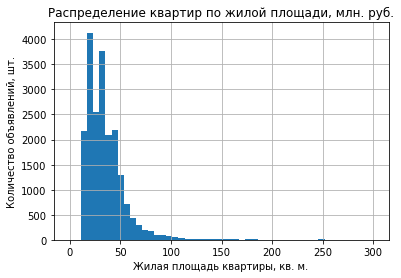

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='living_area'>

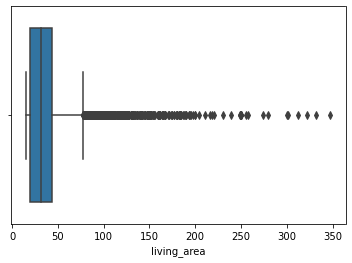

In [124]:
# Посмотрим на выбросы по жилой площади
data.hist('living_area', bins=50, range=(-1, 300))
plt.title('Распределение квартир по жилой площади, млн. руб.')
plt.xlabel('Жилая площадь квартиры, кв. м.')
plt.ylabel('Количество объявлений, шт.')
plt.show()
sns.boxplot(data['living_area'])

In [125]:
# Здесь также видна зависимость между высокой ценой и большой жилой площадью

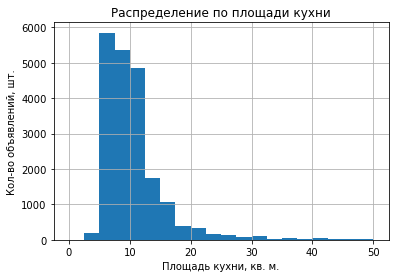

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


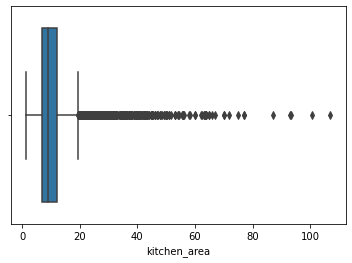

In [126]:
# Посмотрим на выбросы по  площади кухни
data.hist('kitchen_area', bins=20, range=(0,50))
plt.title('Распределение по площади кухни')
plt.xlabel('Площадь кухни, кв. м.')
plt.ylabel('Кол-во объявлений, шт.')
plt.show()
sns.boxplot(data['kitchen_area'])
plt.show()

 - Здесь видим как аномально низкие значения площади, так и аномально высокие. Посмотрим более детально.

In [127]:
data.query('kitchen_area <=2')
# Можно предположить что это кухни в квартирах-студиях. Удалим все те которые меньше или равны 2 м2

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,grouped_by_floor,price_per_square_metre,weekday,month,year,grouped_floor,living_to_total_square,kitchen_to_total_square,last_price_million
906,15,2600000.0,27.00,2017-07-10,1,2.75,23.0,18.0,18,0,...,10.0,больше 17 этажей,96296.296296,0,7,2017,Другое,0.67,0.07,2.60
6262,9,3100000.0,24.00,2018-06-25,2,3.00,5.0,16.0,5,0,...,54.0,до 9 этажей,129166.666667,0,6,2018,Последний,0.67,0.08,3.10
9138,17,2920000.0,23.29,2018-12-12,1,2.80,3.0,21.0,1,0,...,107.0,до 9 этажей,125375.697724,2,12,2018,Первый,0.90,0.09,2.92
11033,6,5350000.0,32.00,2016-04-20,1,2.60,14.0,16.0,10,0,...,210.0,9-17 этажей,167187.500000,2,4,2016,Другое,0.50,0.06,5.35
16367,2,2720000.0,25.70,2017-10-30,1,2.75,19.0,22.6,11,0,...,109.0,9-17 этажей,105836.575875,0,10,2017,Другое,0.88,0.08,2.72
20217,7,4250000.0,28.50,2019-05-01,1,2.80,14.0,19.5,10,0,...,NaN,9-17 этажей,149122.807018,2,5,2019,Другое,0.68,0.05,4.25


In [128]:
data.query('kitchen_area >70')
# Есть выбросы, потому что есть лоты, где жилая площадь меньше площади кухни. Если уберем такие значения, то вероятно можем лишится важных данных по премиальному жилью

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,grouped_by_floor,price_per_square_metre,weekday,month,year,grouped_floor,living_to_total_square,kitchen_to_total_square,last_price_million
492,18,95000000.0,216.0,2017-12-05,4,3.00,5.0,86.0,4,0,...,14.0,до 9 этажей,439814.814815,1,12,2017,Другое,0.40,0.36,95.0000
2489,9,12500000.0,255.0,2017-04-21,3,2.70,2.0,153.9,2,0,...,102.0,до 9 этажей,49019.607843,4,4,2017,Последний,0.60,0.39,12.5000
4394,20,57000000.0,174.0,2015-11-09,3,3.20,10.0,95.0,6,0,...,1039.0,до 9 этажей,327586.206897,0,11,2015,Другое,0.55,0.44,57.0000
10867,1,56844500.0,177.9,2015-01-15,3,3.05,6.0,87.2,5,1,...,NaN,до 9 этажей,319530.635188,3,1,2015,Другое,0.49,0.49,56.8445
14644,17,47000000.0,150.0,2017-02-28,4,3.70,6.0,58.0,5,0,...,507.0,до 9 этажей,313333.333333,1,2,2017,Другое,0.39,0.50,47.0000
16239,5,82400000.0,181.1,2017-05-24,3,3.90,9.0,58.2,4,0,...,501.0,до 9 этажей,454997.239094,2,5,2017,Другое,0.32,0.51,82.4000
16647,15,122000000.0,145.0,2017-04-25,3,3.30,6.0,36.0,2,0,...,335.0,до 9 этажей,841379.310345,1,4,2017,Другое,0.25,0.50,122.0000
16797,9,65850000.0,146.0,2017-07-14,2,2.55,9.0,40.0,3,0,...,77.0,до 9 этажей,451027.397260,4,7,2017,Другое,0.27,0.64,65.8500
20215,2,85000000.0,249.7,2018-02-01,3,2.60,10.0,72.0,9,0,...,26.0,до 9 этажей,340408.490188,3,2,2018,Другое,0.29,0.43,85.0000


In [129]:
data = data.query('kitchen_area >= 3')

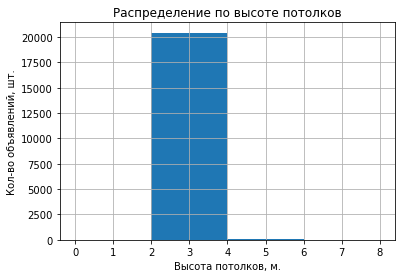

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


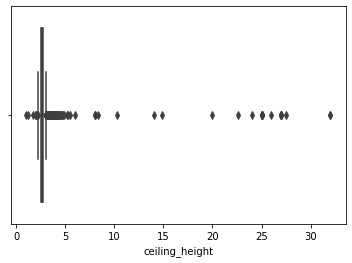

In [130]:
# Посмотрим на выбросы по высоте потолков
data.hist('ceiling_height', bins=4, range=(0,8))
plt.title('Распределение по высоте потолков')
plt.xlabel('Высота потолков, м.')
plt.ylabel('Кол-во объявлений, шт.')
plt.show()
sns.boxplot(data['ceiling_height'])
plt.show()

In [131]:
# Уберем строки, где высота потолков меньше 2м и болше 5
# data.query('ceiling_height > 5')
data = data.query('ceiling_height > 2 and ceiling_height <=5')

### Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

In [132]:
data_ref = data[['locality_name', 'total_area', 'rooms', 'living_area', 'cityCenters_nearest', 'grouped_floor', 'last_price_million', 'weekday', 'month', 'year']]

In [133]:
data_ref

,locality_name,total_area,rooms,living_area,cityCenters_nearest,grouped_floor,last_price_million,weekday,month,year
0,Санкт-Петербург,108.00,3,51.00,16028.0,Другое,13.000,3,3,2019
1,поселок Шушары,40.40,1,18.60,18603.0,Первый,3.350,1,12,2018
2,Санкт-Петербург,56.00,2,34.30,13933.0,Другое,5.196,3,8,2015
4,Санкт-Петербург,100.00,2,32.00,8098.0,Другое,10.000,1,6,2018
8,поселок Мурино,33.16,1,15.43,13056.0,Другое,2.900,2,5,2018
...,...,...,...,...,...,...,...,...,...,...
23692,Тихвин,30.00,1,17.50,13056.0,Другое,1.350,4,7,2017
23693,Петергоф,62.40,3,40.00,34104.0,Другое,4.600,4,8,2016
23694,Санкт-Петербург,133.81,3,73.30,4232.0,Другое,9.700,1,3,2017
23695,Тосно,59.00,3,38.00,13056.0,Другое,3.100,0,1,2018


<AxesSubplot:>

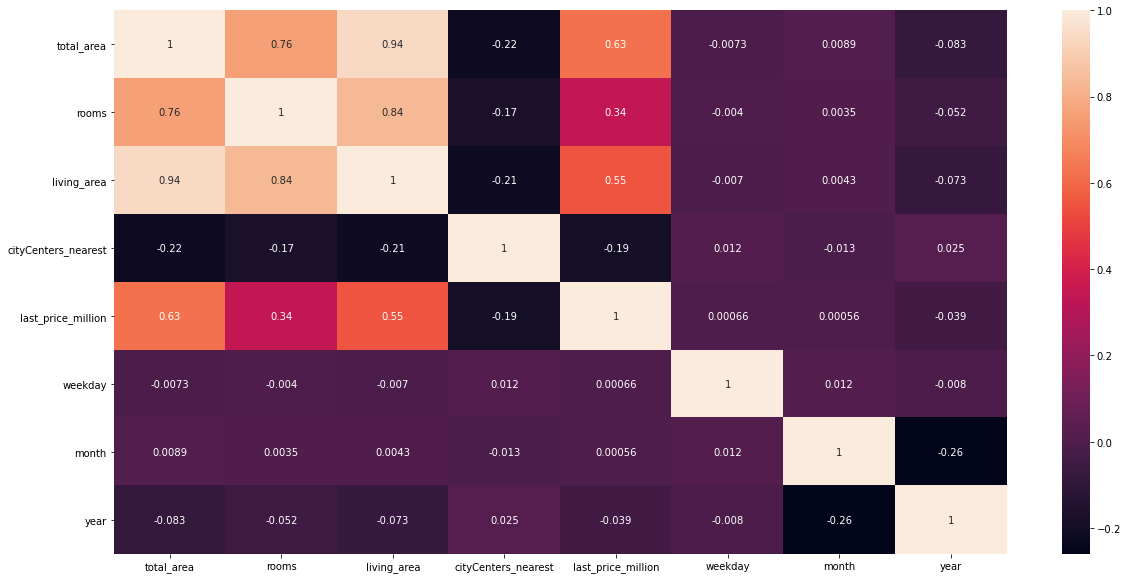

In [134]:
corr = data_ref.corr()
fig, ax = plt.subplots(figsize=(20,10))  
sns.heatmap(corr, annot=True, ax=ax)


- Больше всего на строимость квартиру влияет общая площадь. Также есть корреляция с жилой площадью. Зависимотсть цены от количества комнат не значитлельная. Зависимости цены от расположения в центре не наблюдается.

 **- Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.¶**

In [135]:
# Зависимость цены от количества комнат

data \
    .pivot_table(index='rooms', values='last_price_million') \
    .sort_values('last_price_million',ascending=False)

,last_price_million
rooms,
7,51.687736
6,30.050554
5,22.937534
4,13.197406
3,8.119687
2,5.590111
1,3.833508


<AxesSubplot:xlabel='rooms', ylabel='last_price_million'>

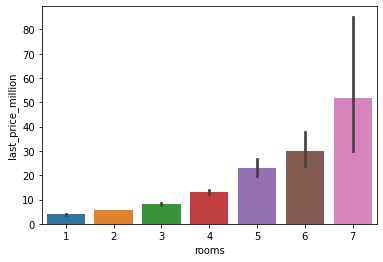

In [136]:
sns.barplot(x='rooms', y='last_price_million', data=data)

- Видим прямую зависимость стоимости от количества комнат. Чем больше комнат, тем выше цена.

In [137]:
# Зависимость цены от этажа

data \
    .pivot_table(index='grouped_floor', values='last_price_million') \
    .sort_values('last_price_million',ascending=False)

,last_price_million
grouped_floor,
Последний,7.077052
Другое,6.786267
Первый,4.817104


<AxesSubplot:xlabel='grouped_floor', ylabel='last_price_million'>

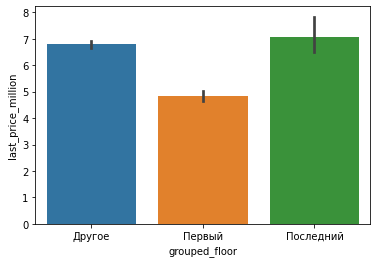

In [138]:
sns.barplot(x='grouped_floor', y='last_price_million', data=data)

- Самая высокая цена на последних этажах. На первом самая низкая.

In [139]:
# Зависимость цены от года

data \
    .pivot_table(index='year', values='last_price_million') \
    .sort_values('last_price_million',ascending=False)

,last_price_million
year,
2014,11.956395
2015,8.229677
2016,6.806380
2019,6.749276
2017,6.599729
2018,6.085054


In [140]:
import seaborn as sns

<AxesSubplot:xlabel='year', ylabel='last_price_million'>

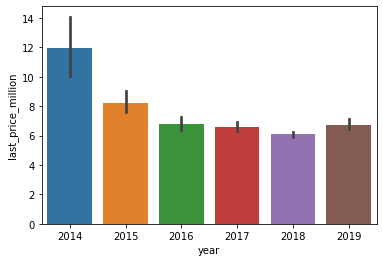

In [141]:
sns.barplot(x='year', y='last_price_million', data=data)

- самая высокая цена на жилье была в 2014 году, далее наблюдается постепенное снижение цен. Если в 2018 году наблюдалась самая низкая цена за рассматриваемые периоды, то в 2019 начался рост цен.

In [142]:
# Зависимость цены от месяца

data \
    .pivot_table(index='month', values='last_price_million') \
    .sort_values('last_price_million',ascending=False)

,last_price_million
month,
12,7.036060
9,7.006290
4,6.899414
1,6.632586
2,6.601196
5,6.538293
11,6.524560
6,6.444589
8,6.441578


<AxesSubplot:xlabel='month', ylabel='last_price_million'>

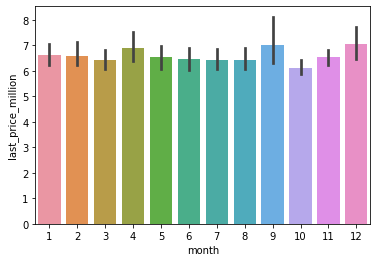

In [143]:
sns.barplot(x='month', y='last_price_million', data=data)

- Самый выгодный для продажи месяц - декабрь. Самые низкие цены в октябре, но разброс цен между месяцами не большой.

In [144]:
# Зависимость цены от дня недели

data \
    .pivot_table(index='weekday', values='last_price_million') \
    .sort_values('last_price_million',ascending=False)

,last_price_million
weekday,
5,7.031563
3,6.801898
0,6.726589
1,6.495213
6,6.451756
4,6.377781
2,6.362474


<AxesSubplot:xlabel='weekday', ylabel='last_price_million'>

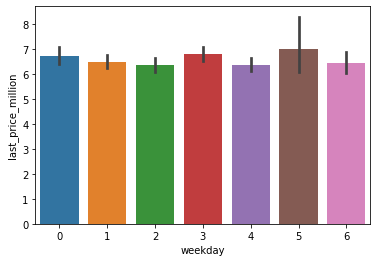

In [145]:
sns.barplot(x='weekday', y='last_price_million', data=data)

### 4.7 Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

In [146]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,grouped_by_floor,price_per_square_metre,weekday,month,year,grouped_floor,living_to_total_square,kitchen_to_total_square,last_price_million
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,0,...,NaN,до 9 этажей,120370.370370,3,3,2019,Другое,0.47,0.23,13.000
1,7,3350000.0,40.40,2018-12-04,1,2.73,11.0,18.60,1,0,...,81.0,до 9 этажей,82920.792079,1,12,2018,Первый,0.46,0.27,3.350
2,10,5196000.0,56.00,2015-08-20,2,2.55,5.0,34.30,4,0,...,558.0,до 9 этажей,92785.714286,3,8,2015,Другое,0.61,0.15,5.196
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,0,...,121.0,9-17 этажей,100000.000000,1,6,2018,Другое,0.32,0.41,10.000
8,20,2900000.0,33.16,2018-05-23,1,2.70,27.0,15.43,26,0,...,189.0,больше 17 этажей,87454.764777,2,5,2018,Другое,0.47,0.27,2.900


In [147]:
top_10= data['locality_name'] \
    .value_counts() \
    .head(10)

In [148]:
top_10_list = list(top_10.index)

In [149]:
top_10_list

['Санкт-Петербург',
 'поселок Мурино',
 'поселок Шушары',
 'Всеволожск',
 'Пушкин',
 'Колпино',
 'Гатчина',
 'поселок Парголово',
 'деревня Кудрово',
 'Петергоф']

In [150]:
data_pivot = data \
    .query('locality_name in @top_10_list') \
    .pivot_table(index='locality_name', values=['last_price', 'total_area'])

In [151]:

data_pivot['mean_price_square_meters'] = round(data_pivot['last_price'] / data_pivot['total_area'])

In [152]:
data_pivot

,last_price,total_area,mean_price_square_meters
locality_name,,,
Всеволожск,3.941654e+06,58.155164,67778.0
Гатчина,3.517567e+06,51.156528,68761.0
Колпино,3.876350e+06,52.746981,73490.0
Петергоф,4.421600e+06,51.863846,85254.0
Пушкин,6.606511e+06,62.774337,105242.0
Санкт-Петербург,8.004638e+06,65.153172,122859.0
деревня Кудрово,4.415110e+06,48.888848,90309.0
поселок Мурино,3.903383e+06,47.598351,82007.0
поселок Парголово,4.685489e+06,55.145439,84966.0


In [153]:
city_with_max_price_for_m2 = data_pivot \
                                .sort_values('mean_price_square_meters', ascending=False)['mean_price_square_meters'].idxmax()
print('Город с максимальной ценой за квадратный метр:  {}'.format(city_with_max_price_for_m2))

Город с максимальной ценой за квадратный метр:  Санкт-Петербург


In [154]:
city_with_min_price_for_m2 = data_pivot \
                                .sort_values('mean_price_square_meters', ascending=False)['mean_price_square_meters'].idxmin()
print('Город с минимальной ценой за квадратный метр:  {}'.format(city_with_min_price_for_m2))

Город с минимальной ценой за квадратный метр:  Всеволожск


In [155]:
data_income = data_pivot \
            .sort_values('mean_price_square_meters', ascending=False) 
print('Город с максимальной ценой {}т.р за квадратный метр - {}'.format(data_income['mean_price_square_meters'][0], data_income.index[0]))
print('Город с минимальной ценой {}т.р за квадратный метр - {}'.format(data_income['mean_price_square_meters'][9], data_income.index[9]))

Город с максимальной ценой 122859.0т.р за квадратный метр - Санкт-Петербург
Город с минимальной ценой 67778.0т.р за квадратный метр - Всеволожск


In [156]:
data_income

,last_price,total_area,mean_price_square_meters
locality_name,,,
Санкт-Петербург,8.004638e+06,65.153172,122859.0
Пушкин,6.606511e+06,62.774337,105242.0
деревня Кудрово,4.415110e+06,48.888848,90309.0
Петергоф,4.421600e+06,51.863846,85254.0
поселок Парголово,4.685489e+06,55.145439,84966.0
поселок Мурино,3.903383e+06,47.598351,82007.0
поселок Шушары,4.224127e+06,56.107409,75286.0
Колпино,3.876350e+06,52.746981,73490.0
Гатчина,3.517567e+06,51.156528,68761.0


 - Самая высокая цена за кв м в Санкт-Петербурге - выше 120тыс за кв.м. Cледующий по значению - город Пушкин.
Самые дешевые квартиры находятся во Всеволожске.

### Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

In [157]:
city_spb = data.query('locality_name == "Санкт-Петербург"')
city_spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,grouped_by_floor,price_per_square_metre,weekday,month,year,grouped_floor,living_to_total_square,kitchen_to_total_square,last_price_million
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,0,...,NaN,до 9 этажей,120370.370370,3,3,2019,Другое,0.47,0.23,13.000
2,10,5196000.0,56.00,2015-08-20,2,2.55,5.0,34.3,4,0,...,558.0,до 9 этажей,92785.714286,3,8,2015,Другое,0.61,0.15,5.196
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,0,...,121.0,9-17 этажей,100000.000000,1,6,2018,Другое,0.32,0.41,10.000
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.6,7,0,...,289.0,до 9 этажей,88524.590164,6,2,2017,Другое,0.71,0.11,5.400
10,5,5050000.0,39.60,2017-11-16,1,2.67,12.0,20.3,3,0,...,137.0,до 9 этажей,127525.252525,3,11,2017,Другое,0.51,0.21,5.050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23688,19,9200000.0,101.00,2019-04-01,3,3.05,15.0,63.0,12,0,...,23.0,9-17 этажей,91089.108911,0,4,2019,Другое,0.62,0.15,9.200
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15.0,16.3,4,0,...,29.0,до 9 этажей,100566.572238,2,2,2018,Другое,0.46,0.26,3.550
23690,3,5500000.0,52.00,2018-07-19,2,2.55,5.0,31.0,2,0,...,15.0,до 9 этажей,105769.230769,3,7,2018,Другое,0.60,0.12,5.500
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.3,7,0,...,519.0,до 9 этажей,129903.978052,3,10,2016,Другое,0.55,0.15,9.470


In [158]:
city_spb[['locality_name', 'cityCenters_nearest']]

,locality_name,cityCenters_nearest
0,Санкт-Петербург,16028.0
2,Санкт-Петербург,13933.0
4,Санкт-Петербург,8098.0
9,Санкт-Петербург,15008.0
10,Санкт-Петербург,13878.0
...,...,...
23688,Санкт-Петербург,14428.0
23689,Санкт-Петербург,16081.0
23690,Санкт-Петербург,6263.0
23691,Санкт-Петербург,4489.0


In [159]:
import warnings

warnings.filterwarnings("ignore")

In [160]:
city_spb['city_centers_km'] = (city_spb['cityCenters_nearest'] / 1000).astype('int')

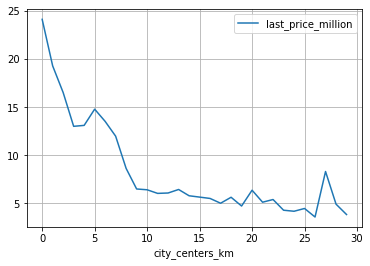

In [161]:
city_spb.pivot_table(index='city_centers_km', values='last_price_million').plot(y='last_price_million', grid=True);

 - График сильно меняется на расстоянии примерно 7 км от центра. Будем считать, что это и есть центр. Есть подъем цены на расстоянии 27 км, возможно обусловлен элитным загородным жильем.

### Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [162]:
city_center_spb = city_spb.query('city_centers_km <= 7')
city_center_spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,grouped_by_floor,price_per_square_metre,weekday,month,year,grouped_floor,living_to_total_square,kitchen_to_total_square,last_price_million,city_centers_km
24,8,6500000.0,97.20,2015-10-31,2,2.80,3.0,46.5,1,0,...,до 9 этажей,66872.427984,5,10,2015,Первый,0.48,0.20,6.500,2
35,6,15500000.0,149.00,2017-06-26,5,2.55,5.0,104.0,4,0,...,до 9 этажей,104026.845638,0,6,2017,Другое,0.70,0.11,15.500,3
51,7,45000000.0,161.00,2017-10-17,3,3.20,8.0,38.0,4,0,...,до 9 этажей,279503.105590,1,10,2017,Другое,0.24,0.31,45.000,6
52,20,11795000.0,136.00,2017-09-22,6,3.00,2.0,94.0,2,0,...,до 9 этажей,86727.941176,4,9,2017,Последний,0.69,0.08,11.795,6
61,18,7990000.0,74.00,2017-08-24,2,3.00,4.0,43.0,4,0,...,до 9 этажей,107972.972973,3,8,2017,Последний,0.58,0.27,7.990,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23665,11,4250000.0,47.00,2016-05-20,1,3.05,6.0,18.2,1,0,...,до 9 этажей,90425.531915,4,5,2016,Первый,0.39,0.31,4.250,4
23681,13,5250000.0,43.00,2018-05-11,2,2.50,5.0,29.0,2,0,...,до 9 этажей,122093.023256,4,5,2018,Другое,0.67,0.14,5.250,7
23690,3,5500000.0,52.00,2018-07-19,2,2.55,5.0,31.0,2,0,...,до 9 этажей,105769.230769,3,7,2018,Другое,0.60,0.12,5.500,6
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.3,7,0,...,до 9 этажей,129903.978052,3,10,2016,Другое,0.55,0.15,9.470,4


Text(0, 0.5, 'Количество квартир')

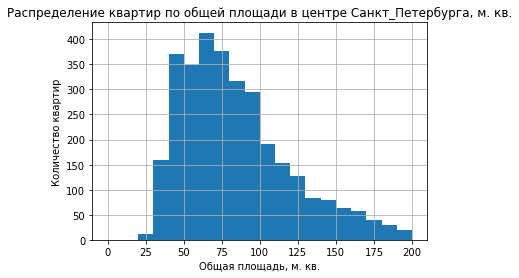

In [163]:
# Анализируем площадь квартир в центре Санкт_Петербурга.
city_center_spb.hist('total_area', bins=20, range=(0, 200))
plt.title('Распределение квартир по общей площади в центре Санкт_Петербурга, м. кв.')
plt.xlabel('Общая площадь, м. кв.')
plt.ylabel('Количество квартир')

In [164]:
city_center_spb['total_area'].describe()

count    3270.000000
mean       91.255306
std        53.650731
min        20.300000
25%        57.500000
50%        78.000000
75%       108.000000
max       631.200000
Name: total_area, dtype: float64

- Большая часть квартир в центре Санкт_Петербурга имеет площадь от 40 до 100 квадратных метров. По всей всем данным большая часть квартир имела площадь от 30 до 70. Вывод: В центре квартиры  большим метражом.

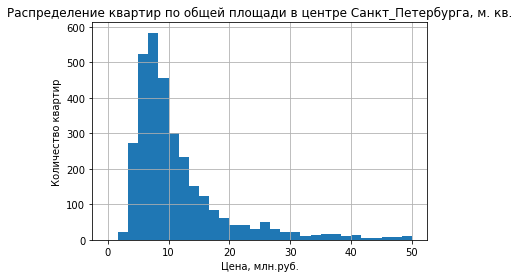

In [165]:
# Анализируем квартиры в центре Санкт_Петербурга по цене.
city_center_spb.hist('last_price_million', bins=30, range=(0, 50))
plt.title('Распределение квартир по общей площади в центре Санкт_Петербурга, м. кв.')
plt.xlabel('Цена, млн.руб.')
plt.ylabel('Количество квартир');

array([[<AxesSubplot:title={'center':'last_price_million'}>]],
      dtype=object)

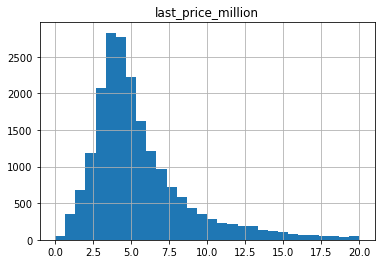

In [166]:
data.hist('last_price_million', bins=30, range=(0, 20))

- Цены в центре от 5 до 10 млн (основная масса). В общей выборке 2,5-6 млн

Text(0, 0.5, 'Количество квартир')

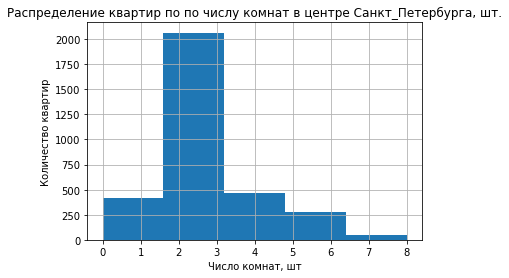

In [167]:
# Анализируем квартиры в центре Санкт_Петербурга по числу комнат.
city_center_spb.hist('rooms', bins=5, range=(0, 8))
plt.title('Распределение квартир по по числу комнат в центре Санкт_Петербурга, шт.')
plt.xlabel('Число комнат, шт')
plt.ylabel('Количество квартир')

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

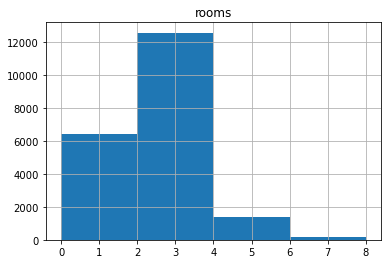

In [168]:
data.hist('rooms', bins=4, range=(0, 8))

- Количество комнат примерно 2-3. Различия в том, что было большое количество однокомнатных  и двухкомнатных квартир в общей выборке. Возможно из-за современной многоквартирной застройки. В то время как в центре остался в основном старый жилой фонд.

Text(0, 0.5, 'Количество квартир')

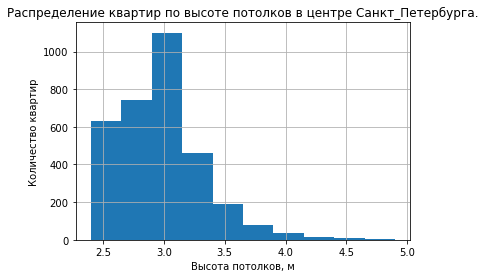

In [169]:
# Анализируем квартиры в центре Санкт_Петербурга по высоте потолков.
city_center_spb.hist('ceiling_height', bins=10)
plt.title('Распределение квартир по высоте потолков в центре Санкт_Петербурга.')
plt.xlabel('Высота потолков, м')
plt.ylabel('Количество квартир')

- Видно, что высота потолков имеет пик в райноне 3м.

In [176]:
city_center_spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,grouped_by_floor,price_per_square_metre,weekday,month,year,grouped_floor,living_to_total_square,kitchen_to_total_square,last_price_million,city_centers_km
24,8,6500000.0,97.20,2015-10-31,2,2.80,3.0,46.5,1,0,...,до 9 этажей,66872.427984,5,10,2015,Первый,0.48,0.20,6.500,2
35,6,15500000.0,149.00,2017-06-26,5,2.55,5.0,104.0,4,0,...,до 9 этажей,104026.845638,0,6,2017,Другое,0.70,0.11,15.500,3
51,7,45000000.0,161.00,2017-10-17,3,3.20,8.0,38.0,4,0,...,до 9 этажей,279503.105590,1,10,2017,Другое,0.24,0.31,45.000,6
52,20,11795000.0,136.00,2017-09-22,6,3.00,2.0,94.0,2,0,...,до 9 этажей,86727.941176,4,9,2017,Последний,0.69,0.08,11.795,6
61,18,7990000.0,74.00,2017-08-24,2,3.00,4.0,43.0,4,0,...,до 9 этажей,107972.972973,3,8,2017,Последний,0.58,0.27,7.990,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23665,11,4250000.0,47.00,2016-05-20,1,3.05,6.0,18.2,1,0,...,до 9 этажей,90425.531915,4,5,2016,Первый,0.39,0.31,4.250,4
23681,13,5250000.0,43.00,2018-05-11,2,2.50,5.0,29.0,2,0,...,до 9 этажей,122093.023256,4,5,2018,Другое,0.67,0.14,5.250,7
23690,3,5500000.0,52.00,2018-07-19,2,2.55,5.0,31.0,2,0,...,до 9 этажей,105769.230769,3,7,2018,Другое,0.60,0.12,5.500,6
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.3,7,0,...,до 9 этажей,129903.978052,3,10,2016,Другое,0.55,0.15,9.470,4


Text(0, 0.5, 'Количество квартир')

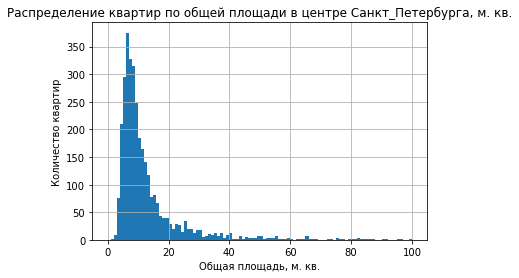

In [184]:
# Анализируем площадь квартир в центре Санкт_Петербурга.
city_center_spb.hist('last_price_million', bins=100, range=(0, 100))
plt.title('Распределение квартир по общей площади в центре Санкт_Петербурга, м. кв.')
plt.xlabel('Общая площадь, м. кв.')
plt.ylabel('Количество квартир')

**- выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).**

<AxesSubplot:ylabel='Frequency'>

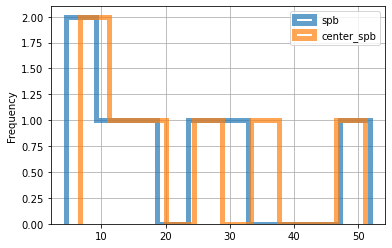

In [170]:
ax = city_spb.pivot_table(index='rooms', 
                          values='last_price_million')\
             .plot(kind='hist', 
                   y='last_price_million', 
                   histtype='step', 
                   linewidth=5, 
                   alpha=0.7, 
                   label='spb')
city_center_spb \
    .pivot_table(index='rooms', 
                 values='last_price_million')\
    .plot(kind='hist', 
          y='last_price_million', 
          histtype='step', 
          linewidth=5, 
          alpha=0.7, 
          label='center_spb', 
          ax=ax, grid=True,legend=True)

<AxesSubplot:ylabel='Frequency'>

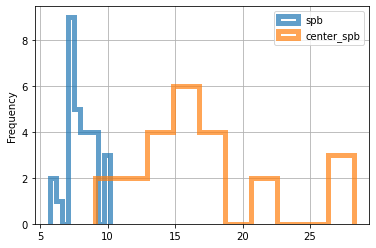

In [171]:
ax = city_spb.pivot_table(index='floor', 
                          values='last_price_million')\
             .plot(kind='hist', 
                   y='last_price_million', 
                   histtype='step', 
                   linewidth=5, 
                   alpha=0.7, 
                   label='spb')
city_center_spb \
    .pivot_table(index='floor', 
                 values='last_price_million')\
    .plot(kind='hist', 
          y='last_price_million', 
          histtype='step', 
          linewidth=5, 
          alpha=0.7, 
          label='center_spb', 
          ax=ax, grid=True,legend=True)

<AxesSubplot:ylabel='Frequency'>

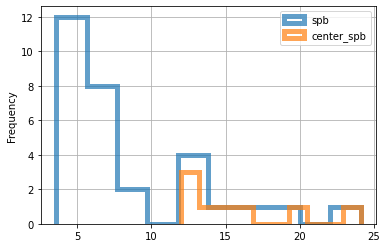

In [172]:
ax = city_spb.pivot_table(index='city_centers_km', 
                          values='last_price_million')\
             .plot(kind='hist', 
                   y='last_price_million', 
                   histtype='step', 
                   linewidth=5, 
                   alpha=0.7, 
                   label='spb')
city_center_spb \
    .pivot_table(index='city_centers_km', 
                 values='last_price_million')\
    .plot(kind='hist', 
          y='last_price_million', 
          histtype='step', 
          linewidth=5, 
          alpha=0.7, 
          label='center_spb', 
          ax=ax, 
          grid=True,
          legend=True)

<AxesSubplot:ylabel='Frequency'>

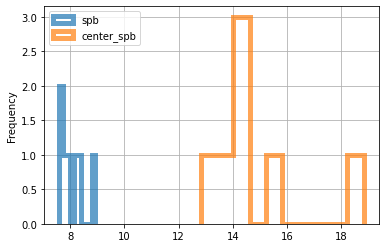

In [173]:
ax = city_spb.pivot_table(index='weekday', 
                          values='last_price_million')\
             .plot(kind='hist', 
                   y='last_price_million', 
                   histtype='step', 
                   linewidth=5, 
                   alpha=0.7, 
                   label='spb')
city_center_spb \
    .pivot_table(index='weekday', 
                 values='last_price_million')\
    .plot(kind='hist', 
          y='last_price_million', 
          histtype='step', 
          linewidth=5, 
          alpha=0.7, 
          label='center_spb', 
          ax=ax, grid=True,legend=True)

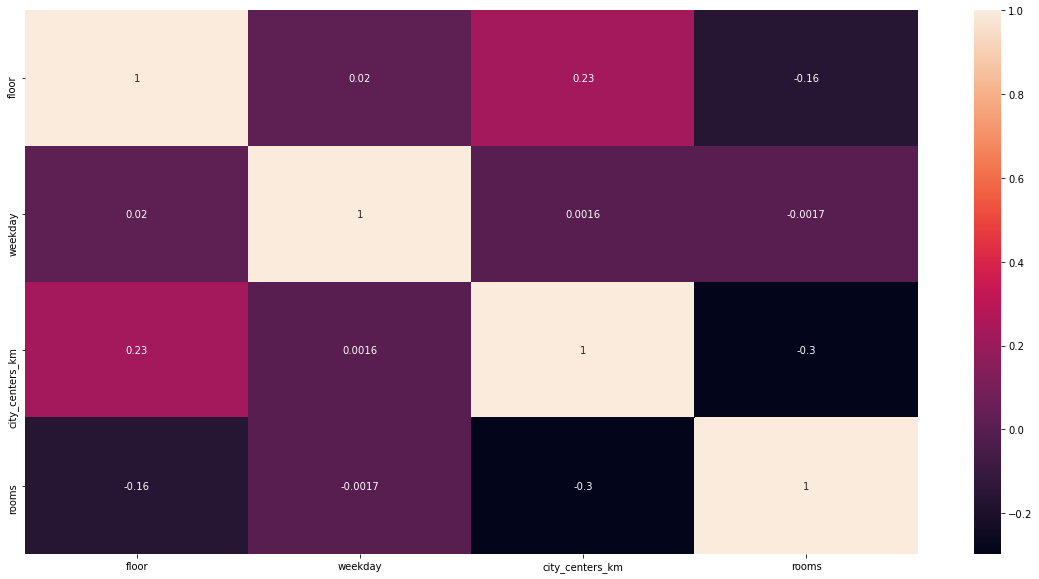

In [174]:
compare_columns = ['floor', 'weekday', 'city_centers_km', 'rooms']
city_spb_corr = city_spb[compare_columns].corr()
fig, ax = plt.subplots(figsize=(20,10))  
sns.heatmap(city_spb_corr, annot=True, ax=ax);

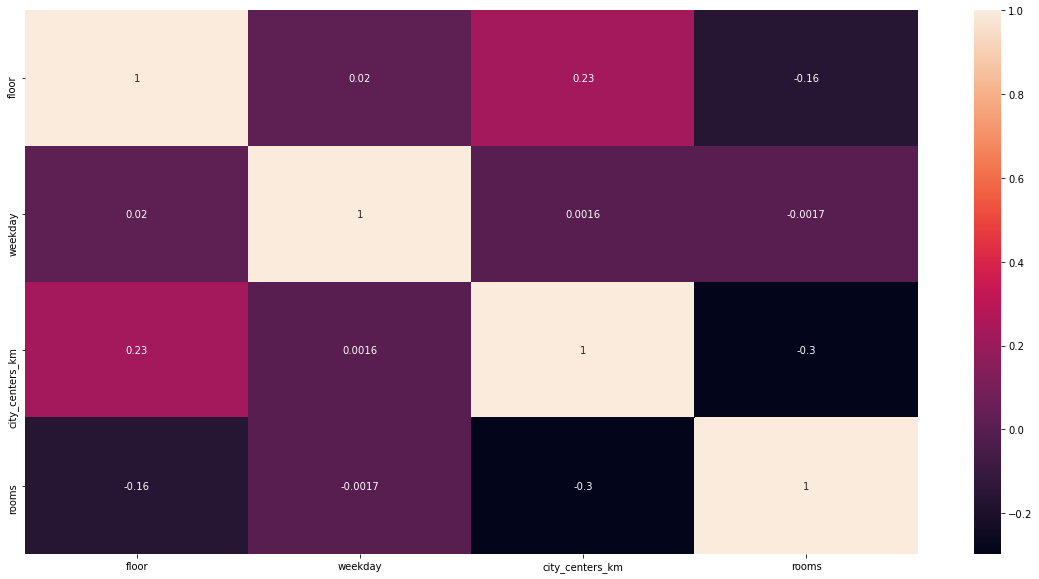

In [175]:
compare_columns = ['floor', 'weekday', 'city_centers_km', 'rooms']
city_center_spb_corr = city_center_spb[compare_columns].corr()
fig, ax = plt.subplots(figsize=(20,10))  
sns.heatmap(city_spb_corr, annot=True, ax=ax);

## Выводы:

    1. На первом шаге были выявлены пропуски. Основные возможные причины:

        1.1 Пользователь не указал признак по незнанию что заполнять
        1.2 Какие-то признаки могли отсутсвовать на карте (parks_around3000, parks_nearest, ponds_nearest). Пропуски в этих признаках имели большую корреляцию, т.е отсутсвие значение в одном признаке отражало отсутсвие в другом.
        1.3 Такой прризнак как days_exposition мог быть незаполнен, т.к пользователь после продажи просто забыл закрыть объявление или передумал продавать квартиру.

    2. Для заполнения пустых значений по признакам в основном использовалось медианное значение для сглаживания выбросов. Для некоторых признаков использовалось медианное значение для группы.

    3. Были заменены типы данным для некоторых признаков в соответсвии с их логикой.

    4.1 Выводы по исследовнию данных. Исследование проводилось на основании построенных графиков.
        4.1.1. Большинство квартир имеют цену продажи от 2,5 до 6 млн
        4.1.2. Чаще всего квартиры имеют 1-3 комнаты
        4.1.3. Высота потолка от 2.5 до 2.8 метров
        4.1.4. Большая часть квартир продается за 100 дней. 

    4.2 Были удалены выбросы. Кухня менее 2 кв. м., общая площадь - менее 15 кв. м. 

    4.3 Цена квартиры имеет наибольшую коррреляцию с общей площадью квартиры (коэффициент корреляции = ). Имеется незначительная корреляция с количеством комнат (коэффициент корреляции = ). 

    4.4 После очистки данных получили следующие значения:
        4.4.1. На цену влияет количество комнат: чем больше конат, тем выше цена.
        4.4.2. Самая высокая цена на жилье была в 2014 году, далее наблюдается постепенное снижение цен. Если в 2018 году наблюдалась самая низкая цена за рассматриваемые периоды, то в 2019 начался рост цен.
        4.4.3. Самый выгодный для продажи месяц - декабрь. Самые низкие цены в октябре, но разброс цен между месяцами не большой, поэтому этим модно принебречь и считать, что зависимость незначительна.
        4.4.4. Цена квартиры на первом этаже имеет более низкую стоимость, чем на последнем или другом.

    4.5 Самые дорогие квартиры приходятся на Санкт-Петербург: чуть выше 120тыс за кв м. По построенным графикам было выявлены, что центром считается область города на расстоянии до 7 км. Если жилье находится дальее 7 км, то цена на него снижается (за исключением нескольким выбросов, возможно обусловенных загородным элитным жильем)

    4.6 Характеристика квартир в Санкт-Петербурге. Сравнение ситуации по центру и Санкт-Петербургу в целом.
        4.6.1. Большая часть квартир в центре Санкт_Петербурга имеет площадь от 40 до 100 квадратных метров. По всей всем данным большая часть квартир имела площадь от 30 до 70. Вывод: В центре квартиры большим метражом.
        4.6.2.  Цены в центре от 5 до 10 млн (основная масса). В общей выборке 2,5-6 млн
        4.6.3. Количество комнат примерно 2-3. Различия в том, что было большое количество однокомнатных  и двухкомнатных квартир в общей выборке. Возможно из-за современной многоквартирной застройки. В то время как в центре остался в основном старый жилой фонд.
        4.6.4. Высота потолков имеет пик в райноне 3м.
        4.6.5. В центре квартиры более дорогие, если исключить дорогое жилье в общей выборке


Общий вывод: Самое дорогое жилье находится в Санкт-Петербурге, затем идет город Пушкин. Самое дешевое - в Всеволожске. Особое внимание в рекомендательной системе следует уделять следующим признакам: общая площадь, жилая площадь, количество комнат, расстояние от центра города (центр услвно считать с 7км от центра). Квартиры в центре, будут иметь большую стоимость и большее количество комнат.
